## Data Information

Data have 5 columns and more than 100 million rows. There are about 1 million users whoes user behaviors including click, purchase, adding item to shopping cart and item favoring during November 25 to December 03, 2017. Each line represents a specific user-item interaction, which consists of user ID, item ID, item's category ID, behavior type and timestamp, separated by commas.

In [ ]:
# Modules imported
import pandas as pd
import numpy as np
import matplotlib as plt

In [ ]:
data = pd.read_csv('/Users/paxton615/Downloads/UserBehavior.csv')

In [ ]:
data.shape

In [ ]:
data.isnull().sum()

In [ ]:
data.nunique() # take 2-3 minutes to complete, be cautious to run this line

In [ ]:
data.head()

In [ ]:
# col names = ['user_id', 'item_id','category_id','status',"timestamp"]
# pv: page view, buy: buy, cart: cart:, fav:favorite
data.columns = ['user_id', 'item_id','category_id','status',"timestamp"]

Trying some concert code here：

fun = data.head()
fun

str(pd.Timestamp(fun['timestamp'][0], unit='s'))[:10] 

convert str to timestamp
str(pd.Timestamp('2017-11-11').year)+'-'+str(pd.Timestamp('2017-11-11').month)

pd.Timestamp(fun['timestamp'][0], unit='s').hour

pd.Timestamp(fun['timestamp'][0], unit='s').month

It worked!

In [ ]:
# select 3 million for analysis, calling them 'users'
users = data.iloc[5000000:8000000,:]

In [ ]:
users.shape

In [ ]:
users.reset_index(drop=True, inplace=True)

In [ ]:
users.head()

In [ ]:
users.nunique()

In [ ]:
# How much does ths sample, users, represent the population.
total_nuni = ['1 987994','2268318 4162024','2520377 9439','pv 4','1511544070 815859']

pop_unq = [int(i.split(' ')[1]) for i in total_nuni]
pop_unq

sample_unq = [i for i in users.nunique()]
sample_unq

perctage = []
for i,j in zip(sample_unq,pop_unq):
    perctage.append('{:2%}'.format(i/j))

# the subset, users, contains 3% of total users,
# 19% of total items, 73% of categories
perctage

In [ ]:
users['hour']=[pd.Timestamp(i, unit='s',tz='Asia/Shanghai').hour for i in users.timestamp]

users['year']=[pd.Timestamp(i, unit='s',tz='Asia/Shanghai').year for i in users.timestamp]

users['day']=[pd.Timestamp(i, unit='s',tz='Asia/Shanghai').day for i in users.timestamp]

users['month']=[pd.Timestamp(i, unit='s',tz='Asia/Shanghai').month for i in users.timestamp]
# 0 is Monday，6 is Sunday
users['dayofweek']=[pd.Timestamp(i, unit='s',tz='Asia/Shanghai').dayofweek for i in users.timestamp]

In [ ]:
users.year.unique() # data were generated during 2017-11-25 to 2017-12-3
# 2020,1919,2021 need to be found and cleaned later!

In [ ]:
users[(users['year']==1919)| (users['year']==2021)|(users['year']==2020)].count()

In [ ]:
users = users[users['year']==2017] # only choose 2017 data

In [ ]:
np.sort(users.hour.unique()) # hours seem normal

In [ ]:
users.day.unique() 
# keep the days within 11.25-12.3

In [ ]:
users = users[users['day'].isin([25,26,27,28,29,30,1,2,3])] 

In [ ]:
users.month.unique()
# data happened during 2017.11-2017.12, some months need to be cleaned

In [ ]:
users[(users['month']==10)| (users['month']==4)|(users['month']==9)|(users['month']==5)|(users['month']==8)].count()


In [ ]:
users = users[users['month'].isin([11,12])]

In [ ]:
users.shape

In [ ]:
users.head() 

In [ ]:
users.to_csv(r'/Users/paxton615/Github_Personal/Alibaba_UserBehavior_Analysis/drafts/users_3m.csv')

In [ ]:
# dropduplicstes: same user,same day, same hour, viewed the same item 
users = users.drop_duplicates(subset=['user_id','item_id','status','hour','day'])


In [ ]:
users.shape

In [ ]:
users.head()

In [ ]:
# Form user['date'] by using year, month, day
date = []
for i,j,k in zip(users['year'], users['month'], users['day']):
    date.append(str(i)+"-"+str(j)+"-"+str(k))

users['date']=pd.to_datetime(date)

users.head()

In [ ]:
# tidy cols and reset_index
users = users[['user_id', 'item_id' , 'category_id', 'status', 'date','dayofweek' ,'hour']]
users.reset_index(drop=True, inplace=True)

In [ ]:
users.dtypes
# Could convert hour to datetime as well, however, don't see the need yet
# pd.to_datetime(users['hour'], format='%H')

In [ ]:
users.head()

In [ ]:
users.to_csv(r'/Users/paxton615/Github_Personal/Alibaba_UserBehavior_Analysis/drafts/users_2m.csv')

# Saved , 2.7m entries.

In [1]:
# Modules imported
import pandas as pd
import numpy as np
import matplotlib as plt

In [2]:
users = pd.read_csv('/Users/paxton615/Github_Personal/Alibaba_UserBehavior_Analysis/drafts/users_2m.csv')


In [3]:
users.head()

,Unnamed: 0,user_id,item_id,category_id,status,date,dayofweek,hour
0,0,309818,4710383,1792277,pv,2017-11-29,2,20
1,1,309818,1421743,4069500,pv,2017-11-29,2,20
2,2,309818,800137,1216617,pv,2017-11-29,2,20
3,3,309818,2493122,1216617,pv,2017-11-29,2,20
4,4,309818,1461532,3102419,pv,2017-11-30,3,7


In [4]:
users.drop('Unnamed: 0', axis=1, inplace=True)

In [5]:
users.head()

,user_id,item_id,category_id,status,date,dayofweek,hour
0,309818,4710383,1792277,pv,2017-11-29,2,20
1,309818,1421743,4069500,pv,2017-11-29,2,20
2,309818,800137,1216617,pv,2017-11-29,2,20
3,309818,2493122,1216617,pv,2017-11-29,2,20
4,309818,1461532,3102419,pv,2017-11-30,3,7


# 用户使用行为的漏斗模型

分析用户使用行为的漏斗模型，AARRR模型分析用户行为，此处数据主要涉及用户刺激和购买转化环节。
通过用户从浏览到最终购买过程的流失情况，包括浏览，收藏，加入购物车和购买。在本例中，各项指标如下:

In [6]:
# 访问用户总数 （UV）:29233
users.nunique()

user_id         29233
item_id        805830
category_id      6910
status              4
date                9
dayofweek           7
hour               24
dtype: int64

In [7]:
# 页面总访问量 （PV）：2406344
users.groupby('status')['user_id'].count()

status
buy       58537
cart     167988
fav       86553
pv      2435888
Name: user_id, dtype: int64

平均每人每周访问量

In [8]:
# Average PV per week per person
avg_pv = users.groupby('status')['user_id'].count().pv / users.user_id.nunique()
'{:.4}'.format(avg_pv)

'83.33'

In [76]:
# 每个用户的pv数量是多少？逻辑：相当于通过按user_id来groupby，统计大类（status）中某个小类（pv）的数量
# 很重要的groupby应用实例，filter之后再做groupby
# 很重要，很重要
user_pv = pd.DataFrame(users[users['status']=='pv'].groupby(users['user_id'],as_index=True)[['status']].count())
user_pv.columns=['pv']
user_pv.head()

,pv
user_id,
34,32
42,50
43,119
310,69
311,34


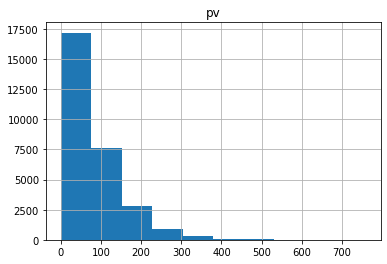

In [88]:
user_pv.hist();

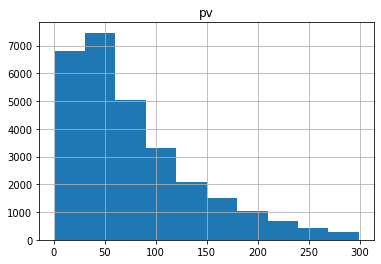

In [106]:
user_pv[user_pv['pv']<300].hist();

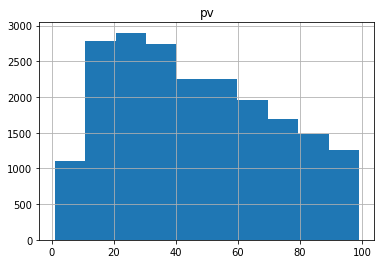

In [107]:
user_pv[user_pv['pv']<100].hist();

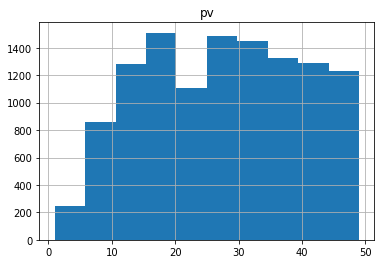

In [108]:
user_pv[user_pv['pv']<50].hist();

In [ ]:
[32,34,24,20,6,23,49,43]

In [152]:
len(list(user_pv.pv.values))

29116

pyechat的histogram缺少自动计算功能，需要手动输入最后数据。


from pyecharts import options as opts
from pyecharts.charts import Bar
from pyecharts.faker import Faker # 很有意思的一个功能
from IPython.display import IFrame
c = (
    Bar()
    .add_xaxis([0,10,20,30,40,50])
    .add_yaxis("商家A", [850,1500,1200,1300,1250], category_gap=0, color=Faker.rand_color())
    .set_global_opts(title_opts=opts.TitleOpts(title="Bar-直方图"))
    .render("bar_histogram.html")

)
IFrame(src='./bar_histogram.html', width=8000, height=800)

In [156]:
# 只有一次浏览记录的用户有多少？
# 可见，非常少，可以忽略不计。
len(user_pv[user_pv['pv'] == 1])

23

In [12]:
# 所有user的总浏览量
users[users['status']=='pv']['user_id'].count()

2435888

In [13]:
# 跳失率
Bounce_rate = len(user_pv[user_pv['pv'] == 1]) / users[users['status']=='pv']['user_id'].count()

'{:.6%}'.format(Bounce_rate)


'0.000944%'

漏斗模型：
喜欢和放入购物车都属于决策环节，二者合一。
百分之多少的人从pv进入了cart和fav环节
又有百分之多少的人从cart和fav环节进入了最后的buy

In [14]:
users_status = users.groupby('status').user_id.count()
users_status

status
buy       58537
cart     167988
fav       86553
pv      2435888
Name: user_id, dtype: int64

In [15]:
# 约10.46%的用户从浏览环节进入决策环节
pv_to_cartnfav = (users_status[1]+users_status[2])/users_status[3]

'{:.2%}'.format(pv_to_cartnfav)

'10.45%'

In [16]:
# 约23.06%的用户从决策环节进入了购买环节，环比之前大幅提升
cartnfav_to_buy = users_status[0]/(users_status[1]+users_status[2])
'{:.3%}'.format(cartnfav_to_buy)

'22.997%'

# 适合展示vote yes or no 之类的结果

from pyecharts import options as opts
from pyecharts.charts import Grid, Liquid
from pyecharts.commons.utils import JsCode
from IPython.display import IFrame

l1 = (
    Liquid()
    .add("lq", [0.23, 0.3], center=["60%", "50%"],)
    .set_global_opts(title_opts=opts.TitleOpts(title="Conversion_Rate:    pv_to_cartnfav=10.45%    cartnfav_to_buy=23%"))
)

l2 = Liquid().add(
    "lq",
    [0.1045, 0.15],
    center=["25%", "50%"],
    label_opts=opts.LabelOpts(
        font_size=35,
        formatter=JsCode(
            """function (param) {
                    return (Math.floor(param.value * 10000) / 100) + '%';
                }"""
        ),
        position="inside",
    ),
)

grid = Grid().add(l1, grid_opts=opts.GridOpts()).add(l2, grid_opts=opts.GridOpts())
grid.render("multiple_liquid.html")

IFrame(src='./multiple_liquid.html', width=700, height=600) # these codes worked

In [165]:
users.head()

,user_id,item_id,category_id,status,date,dayofweek,hour
0,309818,4710383,1792277,pv,2017-11-29,2,20
1,309818,1421743,4069500,pv,2017-11-29,2,20
2,309818,800137,1216617,pv,2017-11-29,2,20
3,309818,2493122,1216617,pv,2017-11-29,2,20
4,309818,1461532,3102419,pv,2017-11-30,3,7


In [169]:
print(len(users[users['status']=='pv']))

print(len(users[(users['status']=='cart') | (users['status']=='fav')]))

print(len(users[users['status']=='buy']))

2435888
254541
58537


In [179]:
from pyecharts import options as opts
from pyecharts.charts import Funnel
from pyecharts.faker import Faker
from IPython.display import IFrame

x_data = ["pv=2435888", "cart&fav=254541(10.45% of pv)", "buy=58537(23% of cart&fav)"]
y_data = [2435888, 254541, 58537]

data = [[x_data[i], y_data[i]] for i in range(len(x_data))]

(
    Funnel(init_opts=opts.InitOpts(width="800px", height="600px"))
    .add(
        series_name="",
        data_pair=data,
        gap=2,
#         tooltip_opts=opts.TooltipOpts(trigger="item", formatter="{a} <br/>{b} : {c}%"),
        label_opts=opts.LabelOpts(is_show=True, position="outside",color='black'),
        itemstyle_opts=opts.ItemStyleOpts(border_color="#fff", border_width=1),
    )
    .set_global_opts(title_opts=opts.TitleOpts(title="Conversion Rate", subtitle="Alibaba_users"))
    .render("funnel_chart.html")
)
IFrame(src='./funnel_chart.html', width=1000, height=600)

# 不同时间尺度下，用户行为模式分析

1.分析一周内的用户使用情况

In [180]:
users.date.unique()

array(['2017-11-29', '2017-11-30', '2017-12-01', '2017-12-02',
       '2017-12-03', '2017-11-27', '2017-11-28', '2017-11-25',
       '2017-11-26'], dtype=object)

In [181]:
# ub is user behavior
ub_daily_old=pd.DataFrame(users.groupby(['date','status'], as_index=False).user_id.count())
ub_daily_old.head()


,date,status,user_id
0,2017-11-25,buy,5868
1,2017-11-25,cart,17040
2,2017-11-25,fav,9163
3,2017-11-25,pv,258856
4,2017-11-26,buy,5995


In [182]:
# .pivot() 以...为中心旋转 很重要很重要很重要
ub_daily = ub_daily_old.pivot(index='date',columns='status')
ub_daily

user_id                      
status         buy   cart    fav      pv
date                                    
2017-11-25    5868  17040   9163  258856
2017-11-26    5995  18057   9245  260688
2017-11-27    6566  16564   8817  246517
2017-11-28    6055  16468   8639  242771
2017-11-29    6299  16771   8885  247401
2017-11-30    6458  17192   9177  251903
2017-12-01    6137  18759   9088  264524
2017-12-02    7707  23909  12058  334480
2017-12-03    7452  23228  11481  328748

In [183]:
# 好像可以对multi_colums的col name直接做修改
ub_daily.columns = ['buy', 'cart', 'fav', 'pv']



In [184]:
# 改名后调整cols的顺序
ub_daily = ub_daily[['pv','fav','cart','buy']]
ub_daily

,pv,fav,cart,buy
date,,,,
2017-11-25,258856,9163,17040,5868
2017-11-26,260688,9245,18057,5995
2017-11-27,246517,8817,16564,6566
2017-11-28,242771,8639,16468,6055
2017-11-29,247401,8885,16771,6299
2017-11-30,251903,9177,17192,6458
2017-12-01,264524,9088,18759,6137
2017-12-02,334480,12058,23909,7707
2017-12-03,328748,11481,23228,7452


小结论：
11-29为周三，11-25为周六，12-03为周日
周一到周五数据趋于稳定，周末数据有明显增加，运营活动可向周末时间倾斜

In [232]:
print(list(ub_daily.pv.values))

print(list(ub_daily.fav.values))

print(list(ub_daily.cart.values))

print(list(ub_daily.buy.values))

[258856, 260688, 246517, 242771, 247401, 251903, 264524, 334480, 328748]
[9163, 9245, 8817, 8639, 8885, 9177, 9088, 12058, 11481]
[17040, 18057, 16564, 16468, 16771, 17192, 18759, 23909, 23228]
[5868, 5995, 6566, 6055, 6299, 6458, 6137, 7707, 7452]


In [231]:
from pyecharts import options as opts
from pyecharts.charts import Bar
from pyecharts.faker import Faker

c = (
    Bar(init_opts=opts.InitOpts(width="1000px", height="500px"))
    .add_xaxis(list(ub_daily.index))
    .add_yaxis("pv", [258856, 260688, 246517, 242771, 247401, 251903, 264524, 334480, 328748]) #tried using list(ub_daily.pv.values), doesn't work
    .add_yaxis("cart", [17040, 18057, 16564, 16468, 16771, 17192, 18759, 23909, 23228])
    .add_yaxis("fav",[9163, 9245, 8817, 8639, 8885, 9177, 9088, 12058, 11481])
    .add_yaxis("buy", [5868, 5995, 6566, 6055, 6299, 6458, 6137, 7707, 7452])
    .set_global_opts(
        title_opts=opts.TitleOpts(title="ub_daily : pv_cart_fav_buy"),
#         toolbox_opts=opts.ToolboxOpts(),
        legend_opts=opts.LegendOpts(is_show=False),
    )
    .render("bar_toolbox.html")
)
IFrame(src='./bar_toolbox.html', width=1200, height=600)

2. 分析用户一天内的使用情况

In [233]:
users.head()

,user_id,item_id,category_id,status,date,dayofweek,hour
0,309818,4710383,1792277,pv,2017-11-29,2,20
1,309818,1421743,4069500,pv,2017-11-29,2,20
2,309818,800137,1216617,pv,2017-11-29,2,20
3,309818,2493122,1216617,pv,2017-11-29,2,20
4,309818,1461532,3102419,pv,2017-11-30,3,7


In [234]:
nov_28 = users[users['date']=='2017-11-29'][['user_id','status','hour']]

In [235]:
nov_28.head()

,user_id,status,hour
0,309818,pv,20
1,309818,pv,20
2,309818,pv,20
3,309818,pv,20
74,309824,pv,9


In [236]:
temp = nov_28.groupby(['hour','status'],as_index=False).count()

In [237]:
temp.head()

,hour,status,user_id
0,0,buy,122
1,0,cart,448
2,0,fav,297
3,0,pv,7743
4,1,buy,49


In [238]:
nov_28 = temp.pivot(index='hour',columns='status')

In [239]:
nov_28.head()

user_id                
status     buy cart  fav    pv
hour                          
0          122  448  297  7743
1           49  235  114  3469
2           28  125   62  1969
3           30   86   83  1461
4           20   79   47  1291

In [240]:
nov_28.columns=['buy', 'cart', 'fav', 'pv']

In [241]:
nov_28 = nov_28[['pv','fav','cart','buy']]
nov_28.head()

,pv,fav,cart,buy
hour,,,,
0,7743,297,448,122
1,3469,114,235,49
2,1969,62,125,28
3,1461,83,86,30
4,1291,47,79,20


In [242]:
# 设计一个function，将指定数据自动转换成某日的四种状态浏览记录
def daily_status(df,str_colname1,str_colname2,str_colname3):
    temp = df.groupby([str_colname3,str_colname2],as_index=False).count()
    daily_num = temp.pivot(index=str_colname3,columns=str_colname2)
    daily_num.columns=['buy', 'cart', 'fav', 'pv']
    daily_num = daily_num[['pv','fav','cart','buy']]
    return (daily_num)

In [243]:
nov_29=users[users['date']=='2017-11-29'][['user_id','status','hour']]

In [244]:
daily_status(nov_29,'user_id','status','hour').sort_values('pv',ascending=False).head(7)

,pv,fav,cart,buy
hour,,,,
21,20731,682,1471,521
22,20477,735,1506,419
20,17662,513,1169,392
19,15312,437,1053,376
23,14911,660,1068,297
13,13962,504,945,454
14,13275,494,884,354


In [245]:
# "2017-12-02" correct ; "2017-12-2" incorrect
dec_2=users[users['date']=='2017-12-02'][['user_id','status','hour']]

In [253]:
dec_2_pic = daily_status(dec_2,'user_id','status','hour')

小结论：从每天的数据情况来看，20-23是绝对使用高峰期，应该在此时间段内增加互动营销，以希望更大收益

In [257]:
list(dec_2_pic.pv)

[10501,
 5299,
 2930,
 1786,
 1734,
 2000,
 4390,
 8700,
 11019,
 13548,
 15147,
 15709,
 14813,
 16998,
 16354,
 17368,
 17680,
 15984,
 16192,
 21023,
 25508,
 28747,
 27787,
 23263]

In [261]:
from pyecharts import options as opts
from pyecharts.charts import Bar
from pyecharts.faker import Faker

c = (
    Bar(init_opts=opts.InitOpts(width="1000px", height="500px"))
    .add_xaxis(list(dec_2_pic.index))
    .add_yaxis("pv", list(dec_2_pic.pv), color=Faker.rand_color())
    .set_global_opts(
        title_opts=opts.TitleOpts(title="Dec_2 : pv "),
        datazoom_opts=[opts.DataZoomOpts(), opts.DataZoomOpts(type_="inside")],
    )
    .render("bar_datazoom_both.html")
)
IFrame(src='./bar_datazoom_both.html', width=1200, height=600)


# 不同商品种类的用户行为

1. 统计浏览次数，购买次数，收藏次数，和加入购物车次数最多的商品

In [ ]:
users.head()

In [ ]:
# top item been seen
users[users['status']=='pv'][['item_id','user_id']].groupby('item_id').count().sort_values('user_id',ascending=False).head()

In [ ]:
# top items been bought
users[users['status']=='buy'][['item_id','user_id']].groupby('item_id').count().sort_values('user_id',ascending=False).head(20)

In [ ]:
# top items in fav
users[users['status']=='fav'][['item_id','user_id']].groupby('item_id').count().sort_values('user_id',ascending=False).head(20)

In [ ]:
# top items in cart
users[users['status']=='cart'][['item_id','user_id']].groupby('item_id').count().sort_values('user_id',ascending=False).head(20)

In [ ]:
# 以上四幅图需要一个能有效结合在一起的方式，没有比较，几幅图的意义不大。
# 最好是图形的。

2. 统计所有商品的购买次数

In [ ]:
users.head()

In [ ]:
users[users['status']=='buy'][['item_id','user_id']].head()

In [ ]:
item_buytimes = users[users['status']=='buy'][['item_id','user_id']].groupby('item_id', as_index=False).count().sort_values('user_id',ascending=False)

In [ ]:
item_buytimes.head()

In [ ]:
# There are 38449 kinds of iterms that only been bought once
# only one item was bought 34 times
item_buytimes.groupby('user_id').count()

In [ ]:
item_buytimes_stas = pd.DataFrame(item_buytimes.groupby('user_id').count())

In [ ]:
'{:.2%}'.format(item_buytimes_stas.item_id[1]/sum(item_buytimes_stas.item_id))

84.34%这个数据说明，大部分的销售来源于长尾商品的累积效应。而非爆款商品的带动。

# 基于RFM理论找出有价值的用户

In [ ]:
users.head()

In [ ]:
len(users[users['status']=='buy'].groupby('user_id',as_index=False)['date'].agg(['max']))

In [ ]:
# the most recent shopping record of each user
recent_buy = users[users['status']=='buy'].groupby('user_id',as_index=False)['date'].agg(['max'])

In [ ]:
recent_buy.head()

In [ ]:
recent_buy.columns=['latest_shopping']
recent_buy.reset_index(inplace=True)

In [ ]:
recent_buy.head()

In [ ]:
np.sort(recent_buy.latest_shopping.unique())

In [ ]:
recent_buy['latest_shopping'][1]>'2017-11-02'

In [ ]:
recent_buy['R'] = [0 if '2017-11-25'<= i <='2017-11-27' 
                   else 1 if '2017-11-28' <= i <= '2017-11-30' 
                   else 2 for i in recent_buy.latest_shopping]




In [ ]:
recent_buy.head()

In [ ]:
shopping_freq = users[users['status']=='buy'].groupby('user_id', as_index=False).item_id.count()

In [ ]:
shopping_freq.head()

In [ ]:
shopping_freq[shopping_freq['user_id']==339189]

In [ ]:
shopping_freq.item_id.unique()

In [ ]:
shopping_freq['F'] = [ 5 if i >= 50 
                     else 4 if 49 >= i >= 40
                     else 3 if 39 >= i >= 30
                     else 2 if 29 >= i >= 20
                     else 1 for i in shopping_freq.item_id]

In [ ]:
shopping_freq.head()

In [ ]:
shopping_freq[shopping_freq['user_id']==337305]

In [ ]:
rfm = pd.merge(recent_buy, shopping_freq, on='user_id')[['user_id','latest_shopping','R','F']]

In [ ]:
rfm['R+F'] = rfm['R']+rfm['F']

In [ ]:
rfm.head()

In [ ]:
rfm[rfm['user_id']==337305]

In [ ]:
rfm['R+F'].value_counts(normalize=True)

In [ ]:
1.5/11.4

In [ ]:
7.2/22